#**Salary Prediction**

- Problem statement - Mr Premchand is an HR in Sprout Knowledge Solutions. He needs to predict the salary based on the candidate's experience, test score and interview score. Based on the given data set, create your own machine learning model to predict the salary.


#1.Understanding the business problem and requirement 

- Mr Premchand wants to predict the salary of a candidate based on their attributes and based on the Machine learning model that uses specific data set to predict.

# 2.Data Collection

In [92]:
import pandas as pd

In [255]:
df=pd.read_csv('/content/wokers salary.csv')
df

,experience,test_score,interview_score,salary
0,NaN,7,8,250000
1,three,7,7,470000
2,five,8,8,600000
3,four,9,7,600000
4,three,10,10,850000
5,seven,9,9,950000
6,ten,9,8,1000000
7,eleven,10,8,1200000
8,fifteen,9,9,1400000
9,six,8,6,550000


#3.Data Processing

- Handling missing data 

In [189]:
df.isnull()

,experience,test_score,interview_score,salary
0,True,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [256]:
df['experience']=df['experience'].fillna('zero')
df

,experience,test_score,interview_score,salary
0,zero,7,8,250000
1,three,7,7,470000
2,five,8,8,600000
3,four,9,7,600000
4,three,10,10,850000
5,seven,9,9,950000
6,ten,9,8,1000000
7,eleven,10,8,1200000
8,fifteen,9,9,1400000
9,six,8,6,550000


- Using word2number package to convert the words in the dataset to numbers

In [214]:
!pip install word2number

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [215]:
from word2number import w2n #anonymous function
w2n.word_to_num('ten')

10

In [257]:
df['experience']=df['experience'].apply(lambda x:w2n.word_to_num(x))
df

,experience,test_score,interview_score,salary
0,0,7,8,250000
1,3,7,7,470000
2,5,8,8,600000
3,4,9,7,600000
4,3,10,10,850000
5,7,9,9,950000
6,10,9,8,1000000
7,11,10,8,1200000
8,15,9,9,1400000
9,6,8,6,550000


In [259]:
X=df.drop('salary',axis=1)
X

,experience,test_score,interview_score
0,0,7,8
1,3,7,7
2,5,8,8
3,4,9,7
4,3,10,10
5,7,9,9
6,10,9,8
7,11,10,8
8,15,9,9
9,6,8,6


In [260]:
y=df['salary']
y

0      250000
1      470000
2      600000
3      600000
4      850000
5      950000
6     1000000
7     1200000
8     1400000
9      550000
10     800000
11     500000
12     720000
13    1500000
14     600000
Name: salary, dtype: int64

#4.Building Machine Learning Model

- Scikit learn - Linear Model -Linear Regression


In [261]:
from sklearn import linear_model

- Creating a reference object for linear regression

In [262]:
reg=linear_model.LinearRegression()

- Training the ML Model using fit()


In [263]:
reg.fit(X,y)

LinearRegression()

- Testing the ML Model

In [264]:
ytest=reg.predict(X)
ytest

array([ 310268.77863898,  392262.30584357,  660989.84485444,
        583220.17580703,  858122.08123119,  929717.3838653 ,
       1011710.9110699 , 1135550.08285537, 1383481.17272527,
        541374.53122615,  742983.37205903,  489130.66207479,
        793529.47925323, 1538767.76452114,  618891.45397461])

In [265]:
reg.score(X,y)

0.9833297914158802

In [266]:
reg.predict([[1,5,7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([144583.96227262])

**Formula**

- y=m1x1+m2x2+m3x3+b


- y - output or dependent variable,

- Xn - independent variable or input variable,

- mn - slope or coefficient of input variable Xn

- b - intercept



In [267]:
reg.coef_

array([56720.4736075 , 67118.69817798, 88167.89361789])

In [268]:
reg.intercept_

-864905.2575500152

In [269]:
y=56720.4736075*1+  67118.69817798*5+ 88167.89361789*7-864905.2575500152
y

144583.96227261482

#5.Data Visualization

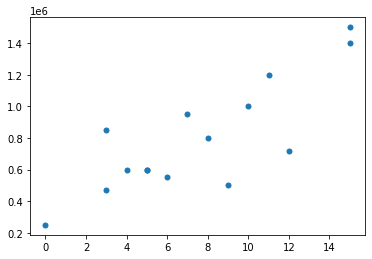

In [270]:
import matplotlib.pyplot as plt
plt.scatter(df['experience'],df['salary'],s=25)

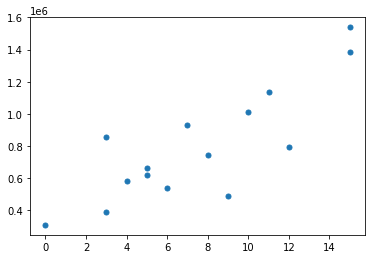

In [271]:
plt.scatter(df['experience'],ytest,s=25)


#6.Downloading my machine learning model

In [272]:
import pickle

In [273]:
with open('myMLModel','wb') as f:#write binary
  pickle.dump(reg,f)#dump-storing

#7.Uploading the machine learning model

In [274]:
import pickle
with open('/content/myMLModel','rb') as f:
  reg=pickle.load(f)

#8.Client file



In [275]:
df=pd.read_csv('/content/drive/MyDrive/hiring_test.csv')
df

,experience,test_score,interview_score
0,five,5.0,6
1,two,7.0,5
2,seven,9.0,9
3,NaN,6.0,9
4,three,6.0,8
5,ten,10.0,10
6,NaN,NaN,7
7,eleven,9.0,8


In [276]:
df['experience']=df['experience'].fillna('zero')
df

,experience,test_score,interview_score
0,five,5.0,6
1,two,7.0,5
2,seven,9.0,9
3,zero,6.0,9
4,three,6.0,8
5,ten,10.0,10
6,zero,NaN,7
7,eleven,9.0,8


In [277]:
import math

In [278]:
testscoremedian=math.floor(df['test_score'].median())
testscoremedian

7

In [279]:
df['test_score']=df['test_score'].fillna(testscoremedian)
df

,experience,test_score,interview_score
0,five,5.0,6
1,two,7.0,5
2,seven,9.0,9
3,zero,6.0,9
4,three,6.0,8
5,ten,10.0,10
6,zero,7.0,7
7,eleven,9.0,8


In [280]:
df['experience']=df['experience'].apply(lambda x:w2n.word_to_num(x))
df

,experience,test_score,interview_score
0,5,5.0,6
1,2,7.0,5
2,7,9.0,9
3,0,6.0,9
4,3,6.0,8
5,10,10.0,10
6,0,7.0,7
7,11,9.0,8


In [281]:
df=df.astype(int)
df

,experience,test_score,interview_score
0,5,5,6
1,2,7,5
2,7,9,9
3,0,6,9
4,3,6,8
5,10,10,10
6,0,7,7
7,11,9,8


In [282]:
predictdf=reg.predict(df)
predictdf

array([ 283297.96308471,  159206.04500029,  929717.3838653 ,
        331317.97407889,  413311.50128349, 1255165.39648366,
        222100.88502109, 1068431.38467739])

In [283]:
df['price']=predictdf
predictdf

array([ 283297.96308471,  159206.04500029,  929717.3838653 ,
        331317.97407889,  413311.50128349, 1255165.39648366,
        222100.88502109, 1068431.38467739])

In [284]:
df.to_csv('Clientoutput.csv',index=False)